In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Numpy: A Primer

Numpy is a high performance matrix/multidimensional-array manipulation and numerical computation library, deriving its reliability and remarkable performance from the underlying Fortran libraries of Blas and Lapack. Those underlying libraries have gone through decades of evolution and maturity.

One way to understand numpy's strength over the traditional python array/list is to realize that numpy handles "vectorized" computations. Let us understand this with an example. Consider that you have two python lists, one of length of some (rectangular) plots of land, and the other list containing the width of the same plots of land.

In [2]:
length = [5,2,7,9,8]
width = [3,2,5,7,8]

How would you derive from these a new list `area` which would list the area of each of these plots of land? Recall that the formula for the area of a rectangular plot is:
$$
\begin{aligned}
A &= l\cdot w \\
\text{where:} \\
l &= \text{length of a rectangle}\\
\text{and}\ \  w &= \text{width of the rectangle}
\end{aligned}
$$

Perhaps you would write the code using list-comprehension as follows:

In [3]:
area = [x*y for x, y in zip(length, width)]
print(f'The areas of the plots are {area}')

The areas of the plots are [15, 4, 35, 63, 64]


It is worth noting this is a bit harder to read, that if we could have done something like:

`area = length * width`

Unfortunately, this is not supported by the traditional python list. You can verify this by uncommenting the below code and running it:

In [4]:
 # area = length * width

Likewise, consider that we need the perimeters of the plots of land. The formula for the perimeter is:

$$
\begin{aligned}
P = 2\cdot (l + w)
\end{aligned}
$$

Therefore, one may be tempted to try the following:

In [5]:
perimeter = 2*(length+width)
print(f'The perimeters of the plots are: {perimeter}')

The perimeters of the plots are: [5, 2, 7, 9, 8, 3, 2, 5, 7, 8, 5, 2, 7, 9, 8, 3, 2, 5, 7, 8]


**The above result is clearly incorrect!** Instead, once again, we must use an element-wise operation to get the result:

In [6]:
perimeter = [2*(x+y) for x, y in zip(length, width)]
print(f'The perimeters of the plots are: {perimeter}')

The perimeters of the plots are: [16, 8, 24, 32, 32]


Thus we see that code for the numerical operations with the default python lists are not very intuitive. But there is a bigger, less obvious problem: python is an interpreted language, so we are looking at a lot of computations at runtime in the interpreter. **These are much slower that the superlative performance scientists are used to getting from Fortran libraries for numerical analysis!**

## The Numpy Way

Consider now the same numerical operations using the Numpy library. First we import the `numpy` library, and convert the above lists `length` and `width` to numpy arrays. 

In [7]:
import numpy as np 

np_length = np.array(length)
np_width = np.array(width)

Let us now, once again, compute the area and perimeter of each of plots of land.

In [8]:
area = np_length*np_width
perimeter = 2*(np_length + np_width)

# Now print the values

print(f'The areas of the plots are {area}')
print(f'The perimeters of the plots are: {perimeter}')

The areas of the plots are [15  4 35 63 64]
The perimeters of the plots are: [16  8 24 32 32]


Observe how:
* the code feels more *native* to numerical computations or math
* we are not doing elemenw-wise operations. **Instead, we are doing vectorized computations directly on the vectors (numpy-arrays)**. These operations are pushed down and done at the BLAS and LINPACK layers.

When the dataset sizes are large, these vectorized operations are orders of magnitude faster than element-wise operation in the python interpreter.

In what follows, we will consider some of the common usages with numpy:

## Numpy Subsetting

In [9]:
area[1]

4

In [10]:
area > 30

array([False, False,  True,  True,  True])

In [11]:
area[area>30]

array([35, 63, 64])

## Non Homogeneous Numpy Array

In [12]:
list_1 = np.array([5,2,8,True, 3, False])
list_2 = np.array([2,True,4,False,1,True])

sum = list_1 + list_2

print(sum)

[ 7  3 12  1  4  1]


## Numpy 2D arrays

In [13]:
dimensions = [[5,2,7,9,8],
              [3,2,5,7,8]]

np_dimensions = np.array(dimensions)

print (np_dimensions)

print(np_dimensions.shape)

print(np_dimensions[0:])

np_area = np_dimensions[0] * np_dimensions [1]
print(np_area)

[[5 2 7 9 8]
 [3 2 5 7 8]]
(2, 5)
[[5 2 7 9 8]
 [3 2 5 7 8]]
[15  4 35 63 64]


## Numpy Statistics

In [14]:
# Generating data through Numpy

length = np.round(np.random.normal(40,10,5000))
width = np.round(np.random.normal(10,3,5000))

np_dimensions = np.column_stack((length, width)) #Stacking length and width together in a 2D numpy array

print(np_dimensions)

[[45.  9.]
 [39.  9.]
 [46.  5.]
 ...
 [71.  8.]
 [48. 11.]
 [32. 12.]]


In [15]:
# Descriptive Statistics

print(np.mean(np_dimensions[:,0])) # Mean of length

print(np.median(np_dimensions[:,0])) # Median of length

print(np.corrcoef(np_dimensions[:,0], np_dimensions[:,1])) # Correlation matrix of length and width

print(np.std(np_dimensions[:,0])) # Standard deviation of length

print(np.sum(np_dimensions[:,0])) # Sum of length

40.0568
40.0
[[ 1.         -0.00156412]
 [-0.00156412  1.        ]]
9.97436583247276
200284.0


## Numpy Array Math

In [16]:
#Basic arthematic operations
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print(x + y)
print(np.add(x, y))

print(x - y)
print(np.subtract(x, y))

print(x * y)
print(np.multiply(x, y))

print(x / y)
print(np.divide(x, y))

print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


In [17]:
# Inner product of vectors
print(x.dot(y))
print(np.dot(x, y))

[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


In [18]:
print(np.sum(x))  # Compute sum of all elements
print(np.sum(x, axis=0))  # Compute sum of each column
print(np.sum(x, axis=1)) 

10.0
[4. 6.]
[3. 7.]


In [19]:
#transpose
print(x)
print(x.T)

[[1. 2.]
 [3. 4.]]
[[1. 3.]
 [2. 4.]]


## Histograms

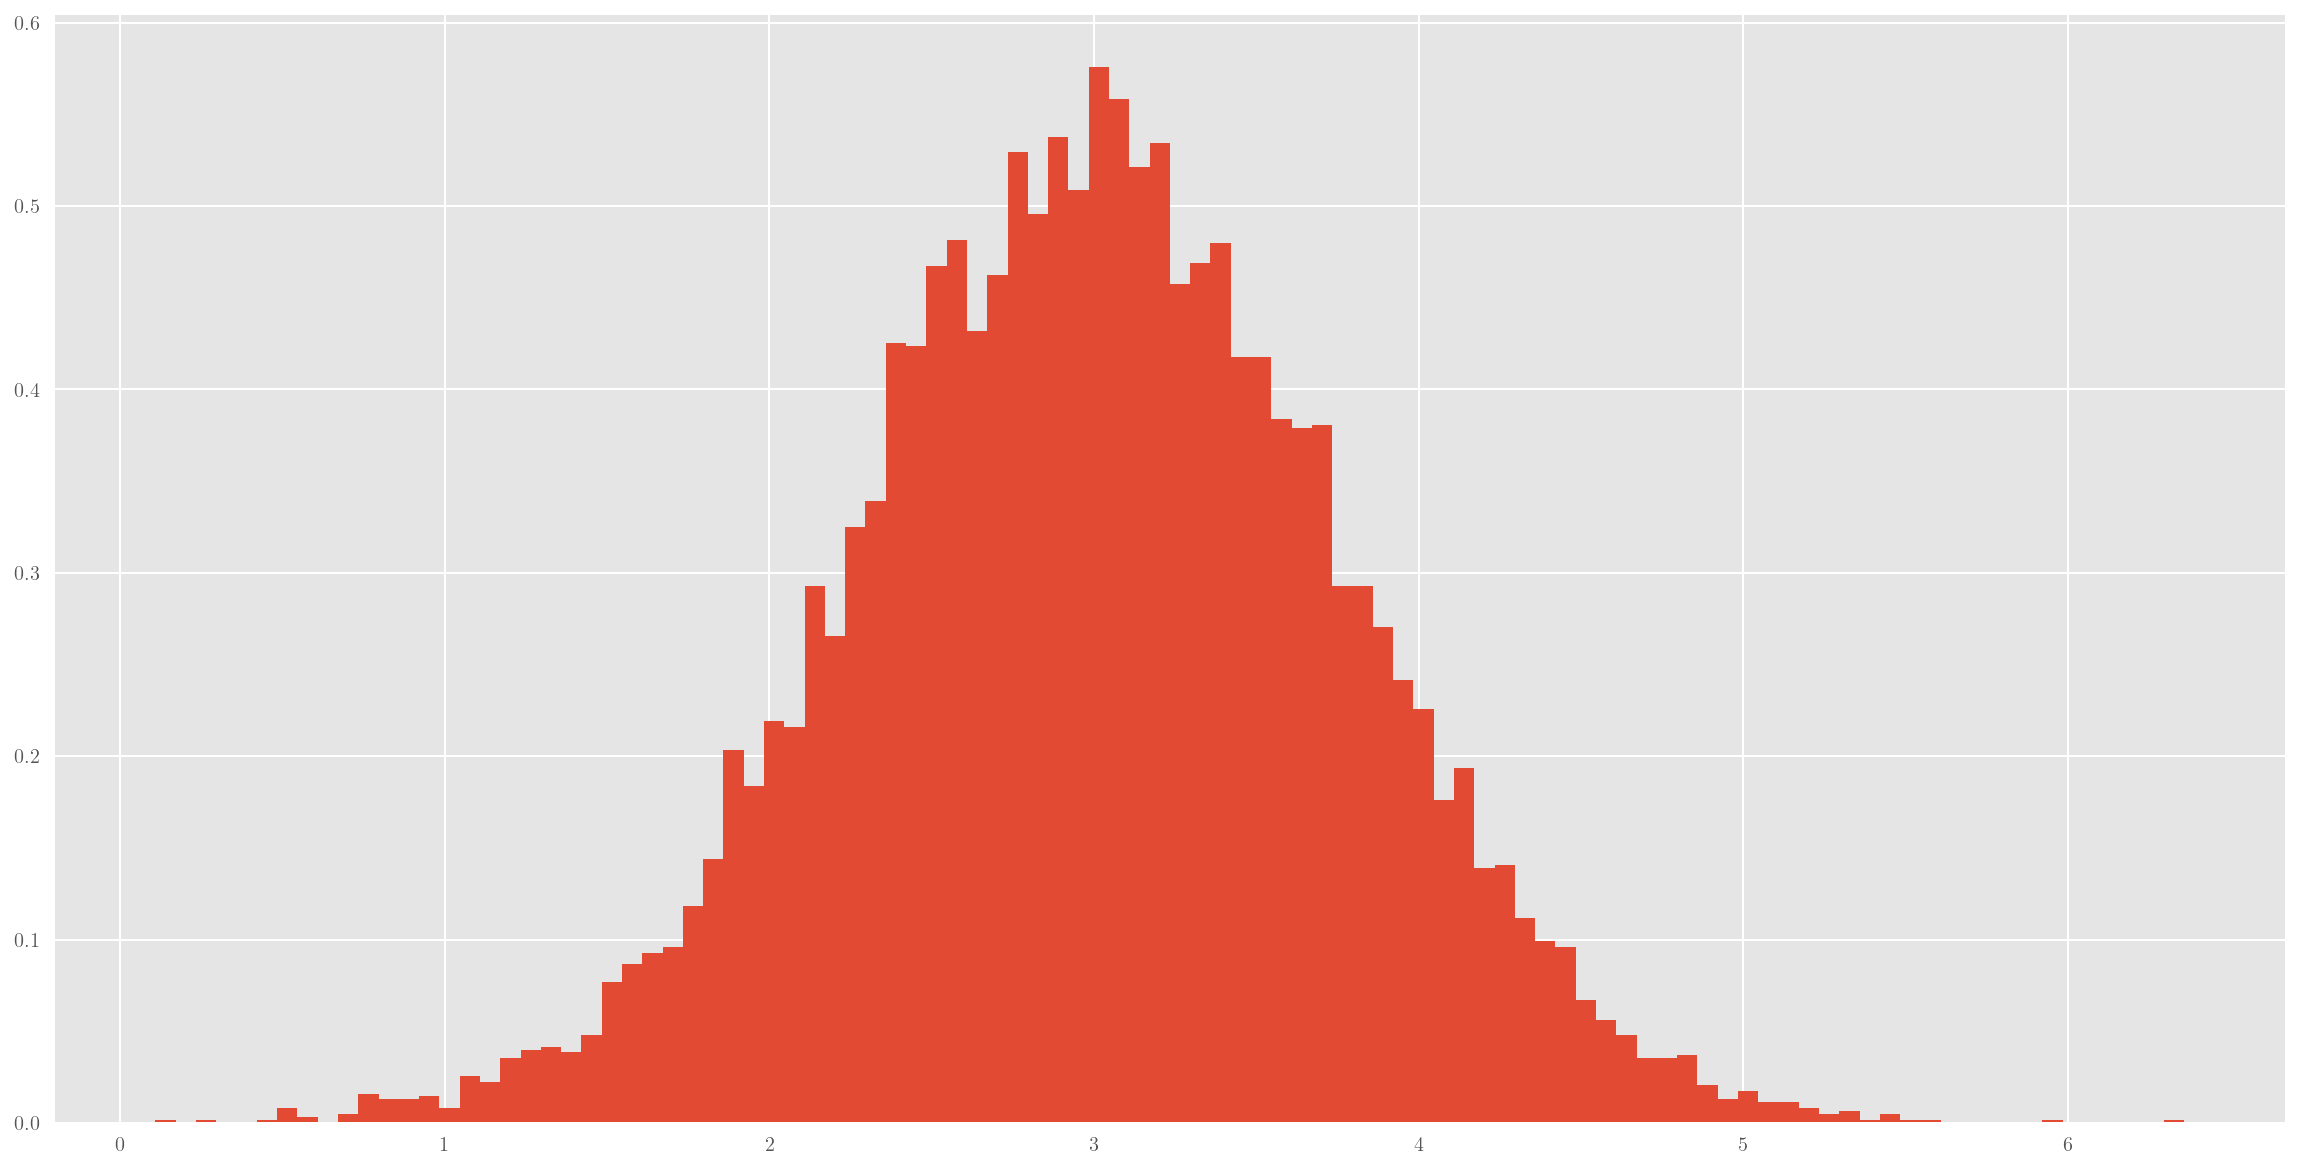

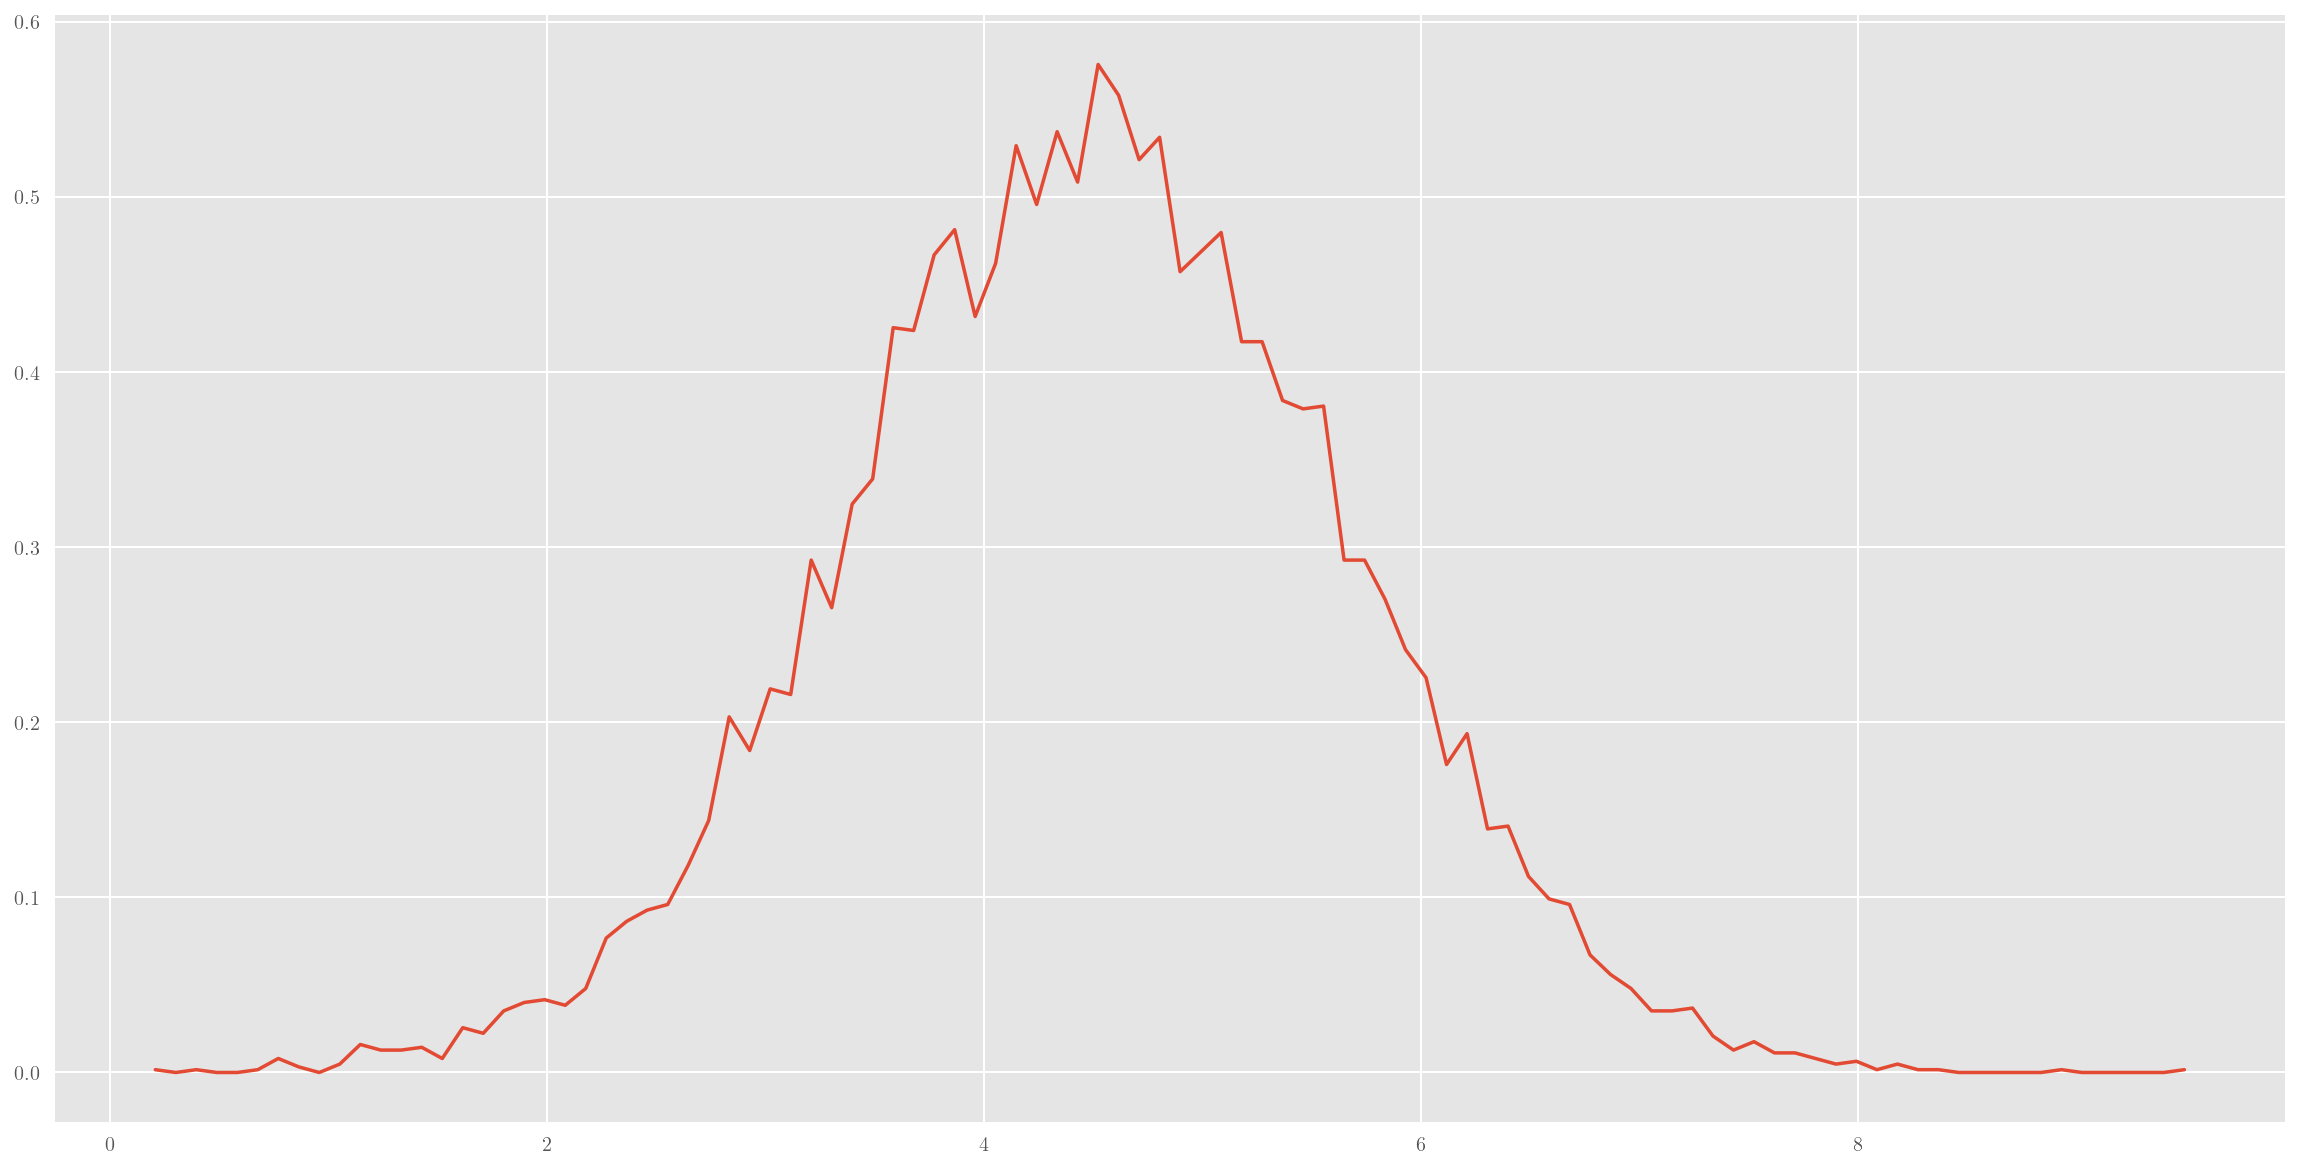

In [20]:
import matplotlib.pyplot as plt

mu, sigma = 3, 0.75
d = np.random.normal(mu,sigma,10000)

#histogram in matplotlib
plt.hist(d, bins=100, density=2)       
plt.show()

# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(d, bins=100, density=True)  # NumPy version (no plot)
plt.plot(.75*(bins[1:]+bins[:-1]), n)
plt.show()

## Numpy examples

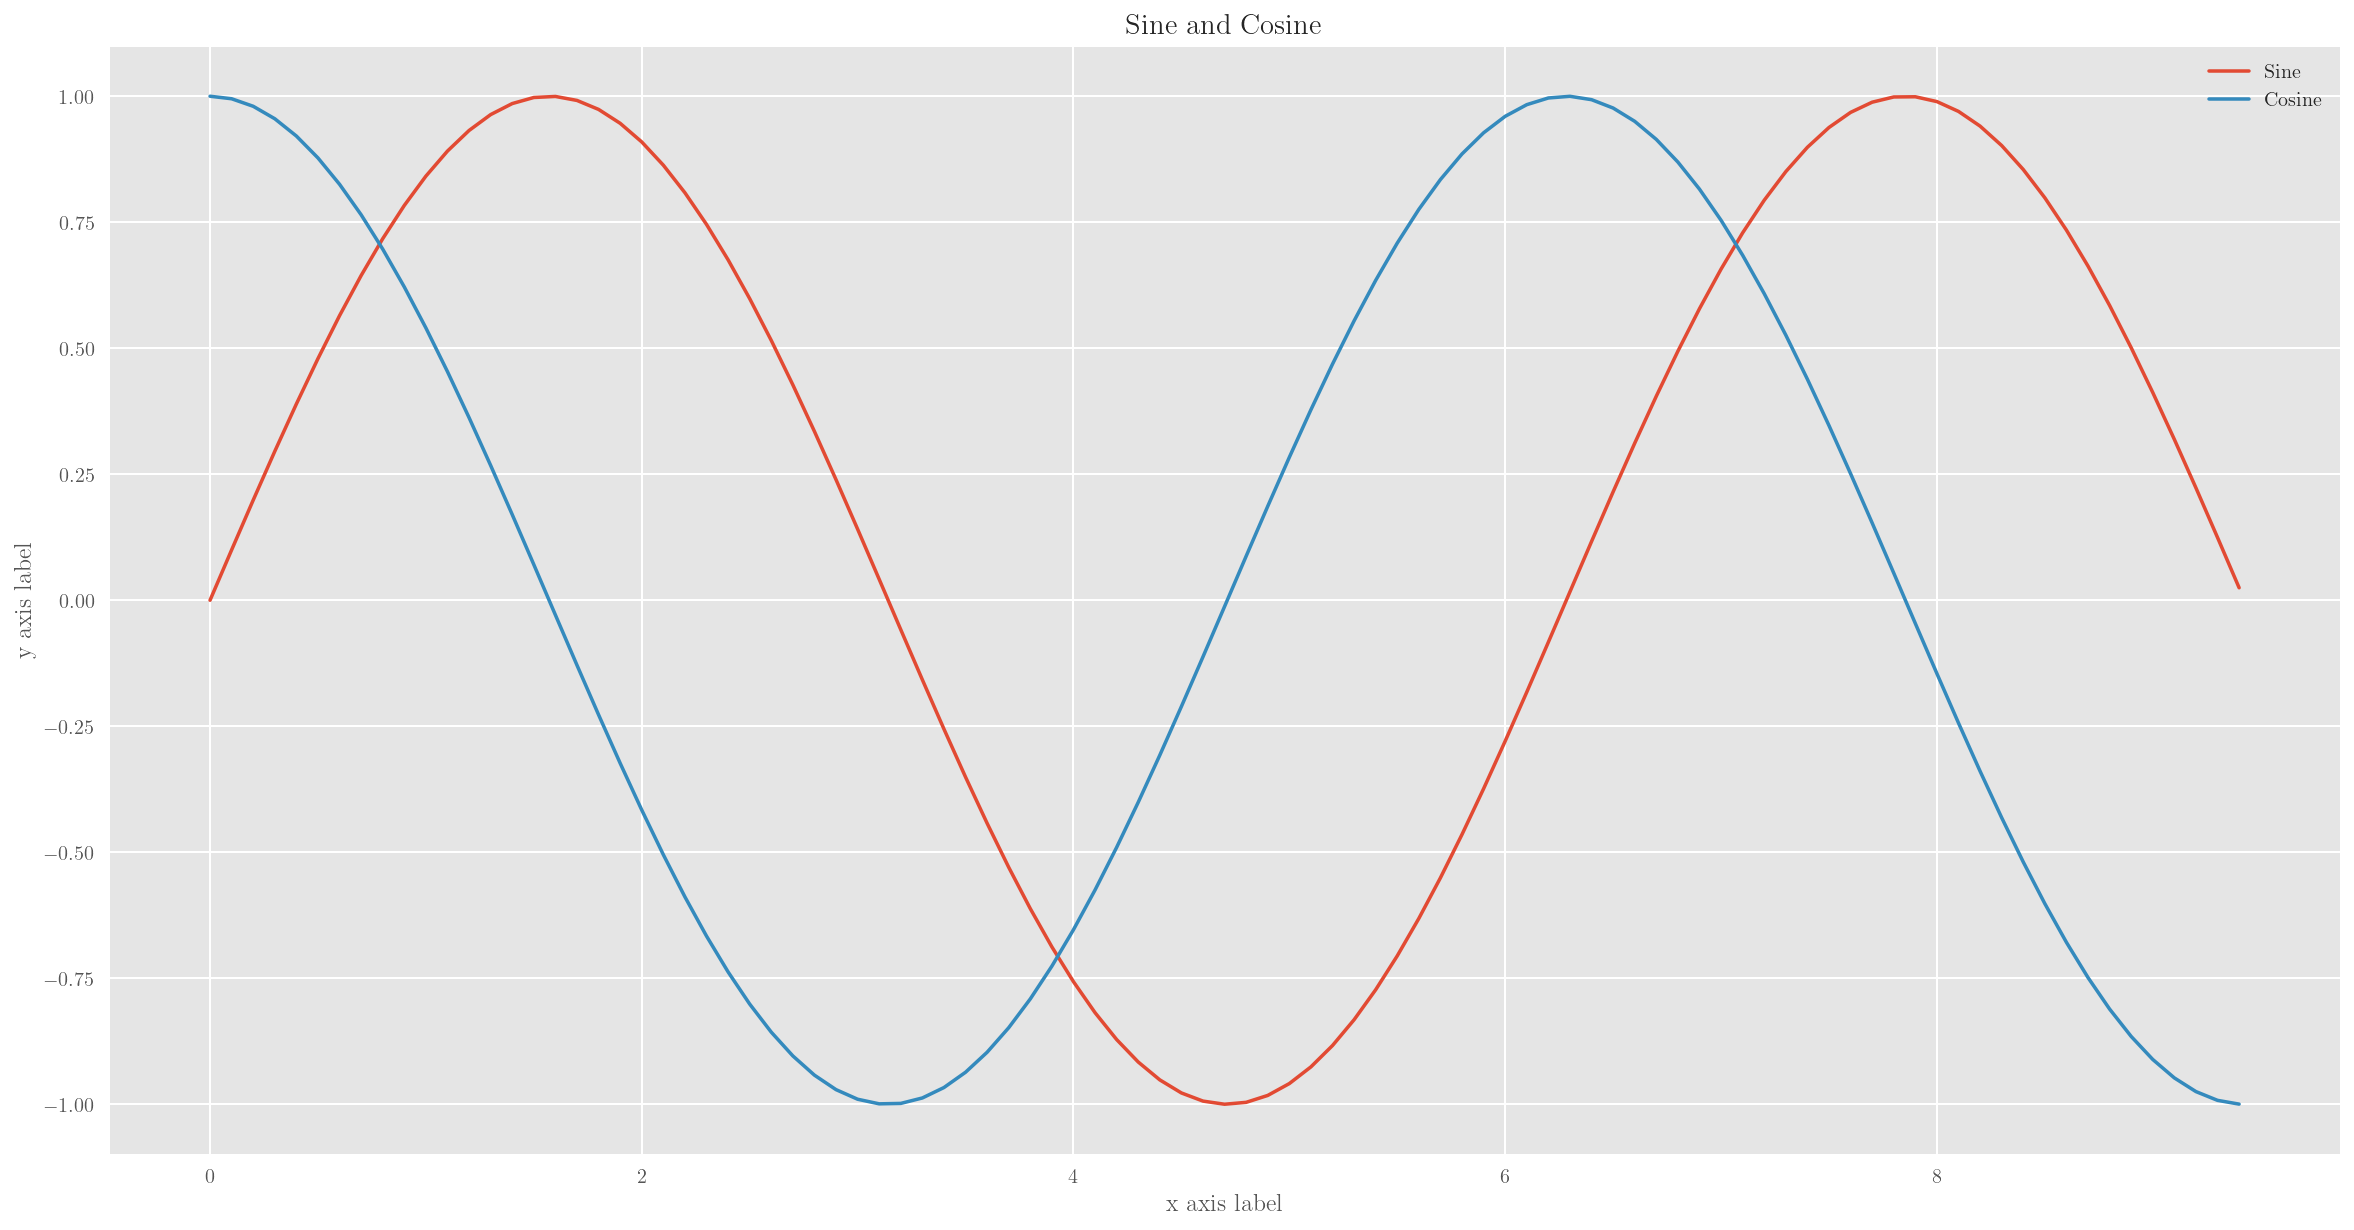

In [21]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Ploting the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()